[*********************100%***********************]  1 of 1 completed
C:\Users\YASHWANTH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.1256 - val_loss: 0.0227
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.

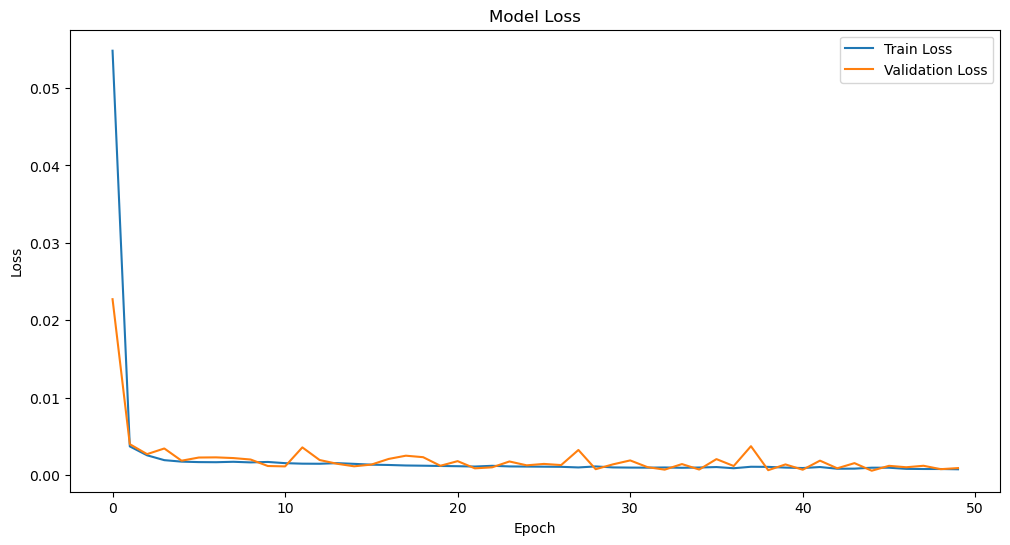

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Mean Squared Error: 18.090801200649583


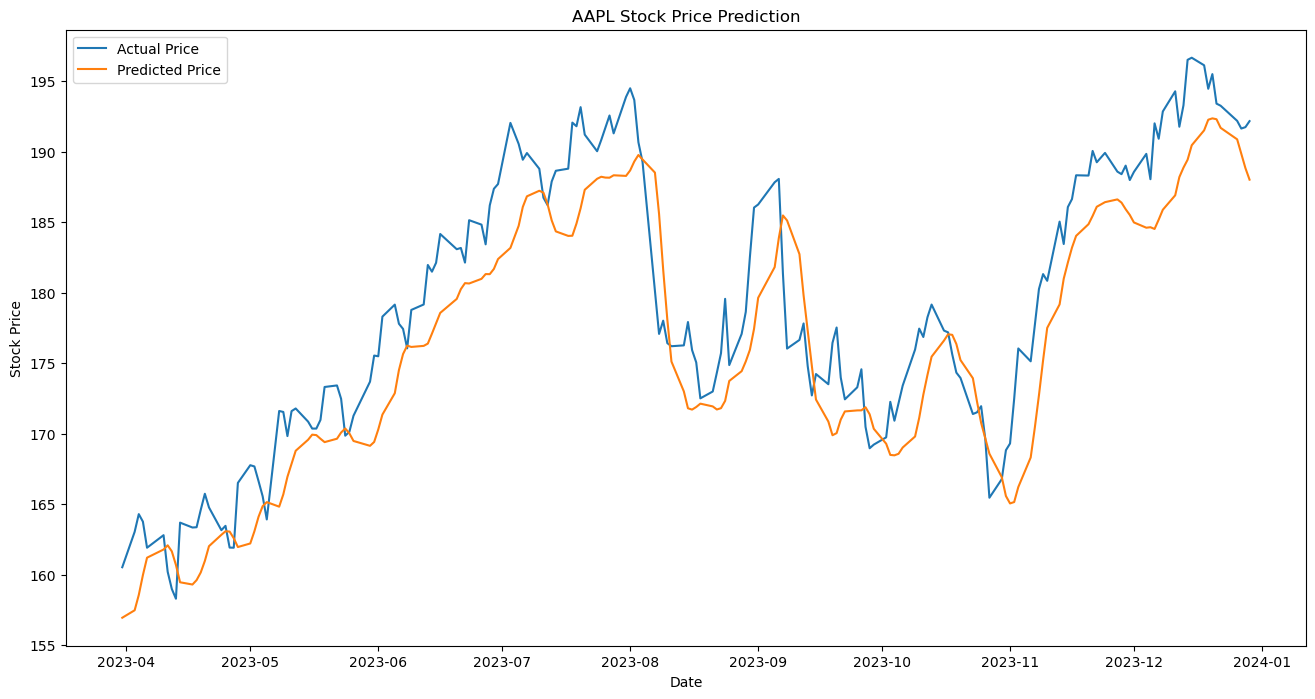


This code provides a basic framework for stock price prediction using LSTM. Remember that financial markets are complex, and the accuracy of such predictions can vary significantly. Further research and experimentation are often needed for more sophisticated models.


In [5]:
# ## Stock Price Prediction using LSTM

# This notebook demonstrates how to predict stock prices using a Long Short-Term Memory (LSTM) neural network.

# ### 1. Import Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# ### 2. Load and Prepare Data

# **Choose a Stock and Timeframe:**
# For this example, let's use historical data for Apple Inc. (AAPL) from Yahoo Finance.
# You can change the ticker symbol and date range as needed.

import yfinance as yf

ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"

data = yf.download(ticker, start=start_date, end=end_date)

# We'll use the 'Close' price for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# ### 3. Data Preprocessing

# **Scale the data:** LSTMs work better with normalized data. We'll use MinMaxScaler to scale the closing prices to a range between 0 and 1.

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# **Create sequences for LSTM:** LSTMs learn from sequences of data. We'll create sequences of a defined length (e.g., 60 days) and their corresponding next day's price.

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60  # You can adjust this sequence length
X, y = create_sequences(scaled_prices, seq_length)

# **Split data into training and testing sets:** We'll use 80% of the data for training and 20% for testing.

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# ### 4. Build the LSTM Model

# We'll create a simple LSTM model with one LSTM layer and a Dense output layer.

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

# ### 5. Train the Model

# Train the LSTM model on the training data.

epochs = 50  # You can adjust the number of epochs
batch_size = 32 # You can adjust the batch size

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ### 6. Make Predictions

# Use the trained model to make predictions on the test data.

predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get the actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# ### 7. Evaluate the Model

# Evaluate the model's performance using metrics like Mean Squared Error (MSE).

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

# ### 8. Visualize the Results

# Plot the actual and predicted stock prices.

plt.figure(figsize=(16, 8))
plt.plot(data.index[train_size + seq_length + 1:], actual_prices, label='Actual Price')
plt.plot(data.index[train_size + seq_length + 1:], predicted_prices, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# ### 9. Future Predictions (Optional)

# To predict future prices, you would typically take the last sequence of the training data (or more recent data if available), feed it into the model, and then iteratively predict the next day's price, appending it to the sequence and removing the first element. This is a more advanced topic and requires careful implementation.

# **Important Considerations and Next Steps:**

# * **More Complex Models:** You can experiment with more complex LSTM architectures (e.g., adding more layers, dropout, different activation functions).
# * **Feature Engineering:** Consider adding other relevant features like volume, open price, high price, low price, and technical indicators (e.g., moving averages, RSI, MACD) to potentially improve prediction accuracy.
# * **Hyperparameter Tuning:** Optimize the hyperparameters of the LSTM model (e.g., number of units, sequence length, learning rate, batch size, epochs) using techniques like grid search or random search.
# * **Regularization:** Use regularization techniques (e.g., dropout) to prevent overfitting.
# * **External Factors:** Real-world stock prices are influenced by numerous external factors (news, economic events, market sentiment) that are not captured in historical price data alone. Incorporating these factors is a significant challenge.
# * **Evaluation Metrics:** Explore other evaluation metrics beyond MSE, such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
# * **Cross-Validation:** For more robust evaluation, consider using time series cross-validation techniques.

print("\nThis code provides a basic framework for stock price prediction using LSTM. Remember that financial markets are complex, and the accuracy of such predictions can vary significantly. Further research and experimentation are often needed for more sophisticated models.")